# Desafio Geofusion

Carregando a libs necessárias

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

%matplotlib inline

Carregando os dados da base Potencial disponibilizada em CSV.
Realizando tratamento da coluna Faturamento que será a variavel target do modelo de regressão linear.
Visualizando as primeiras linhas do arquivo, para ter uma previa dos dados que vamos lidar.

In [46]:
dataset = pd.read_csv('/Users/joaopaulo/Downloads/desafio/potencial.csv')

dataset["FATURAMENTO"] = dataset["FATURAMENTO"].str.replace(',','')
dataset["FATURAMENTO"] = pd.to_numeric(dataset["FATURAMENTO"])
dataset["RENDA"] = dataset["RENDA"].astype(np.str)

dataset.head()

,CODIGO,QTD_AGENCIAS,EMPRESAS,EMPREGADOS,RENDA,FATURAMENTO
0,355620110,2,73,772,D,28467.0
1,3519071024,3,429,1004,E,2707.2
2,3536505002,1,176,1663,C,28580.0
3,3519071026,0,403,2902,C,103710.0
4,3536505001,4,155,478,E,865.0


Descrevendo as colunas, fazendo uma breve analise dos dados com funções que são utilizadas normamente para analise da dados.

In [35]:
dataset.describe()

,CODIGO,QTD_AGENCIAS,EMPRESAS,EMPREGADOS,FATURAMENTO
count,1.330000e+02,133.000000,133.000000,133.000000,1.330000e+02
mean,2.477734e+09,2.075188,290.571429,1801.646617,4.682925e+05
std,1.586817e+09,1.449263,133.412341,1196.012644,1.389014e+06
min,3.519071e+06,0.000000,52.000000,76.000000,1.576000e+02
25%,3.556201e+08,1.000000,178.000000,775.000000,3.047200e+04
50%,3.519071e+09,2.000000,291.000000,1545.000000,8.889100e+04
75%,3.536505e+09,3.000000,398.000000,2526.000000,3.150500e+05
max,3.552403e+09,4.000000,548.000000,5730.000000,1.330320e+07


Plotando a correlação para ficar mais simples de analizar a relação de variaveis

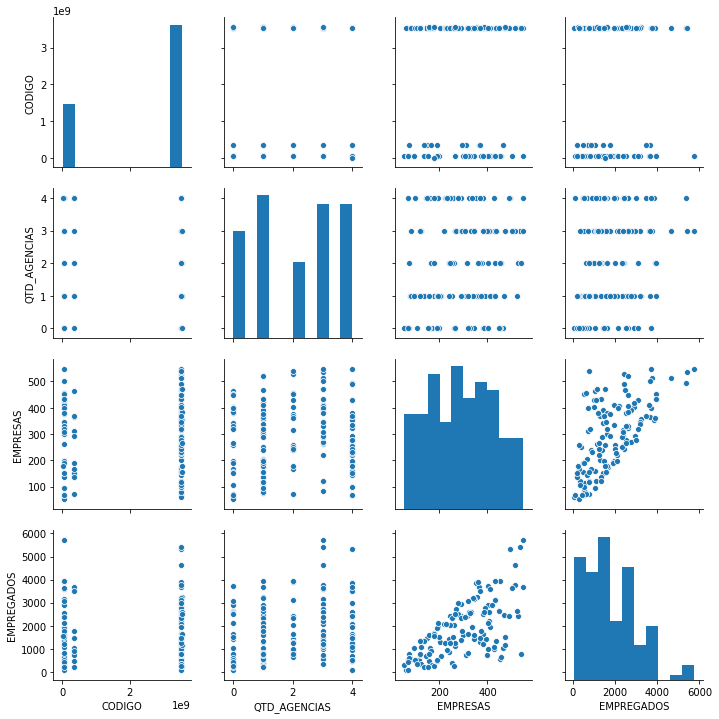

In [12]:
sns.pairplot(dataset)

Visualizando o grafico de distribuição dos dados da nossa variavel target FATURAMENTO

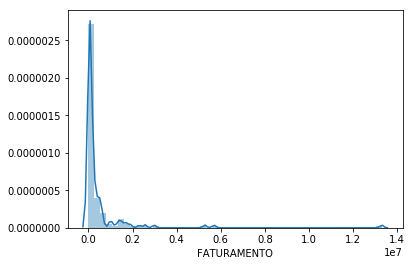

In [38]:
sns.distplot(dataset['FATURAMENTO'])

#Fazendo analise de correlação entre as variaveis do dataset, para escolher as variaveis para o modelo.

In [67]:
dataset.corr()

,CODIGO,QTD_AGENCIAS,EMPRESAS,EMPREGADOS,FATURAMENTO
CODIGO,1.000000,0.151143,0.070400,0.003618,-0.301454
QTD_AGENCIAS,0.151143,1.000000,0.108113,0.182161,0.066297
EMPRESAS,0.070400,0.108113,1.000000,0.643888,0.166910
EMPREGADOS,0.003618,0.182161,0.643888,1.000000,0.251317
FATURAMENTO,-0.301454,0.066297,0.166910,0.251317,1.000000


Pegando o nome das colunas para colocar no dataset.

In [37]:
dataset.columns

Index(['CODIGO', 'QTD_AGENCIAS', 'EMPRESAS', 'EMPREGADOS', 'RENDA',
       'FATURAMENTO'],
      dtype='object')

Separando as colunas para treinar o modelo e a coluna target que será prevista no modelo

Criando a base de treino e teste, separando-a em 25% dela para teste e 75% para treino de forma aleatoria.

In [68]:
colunasTeste = dataset[['CODIGO', 'QTD_AGENCIAS', 'EMPRESAS', 'EMPREGADOS']]
variavel_target = dataset['FATURAMENTO']

X_train, X_test, y_train, y_test = train_test_split(colunasTeste, variavel_target, test_size=0.25, random_state=55)

Inicializando a variavel que irá treinar o modelo, usando a base de treino

In [70]:
modeloLinear = LinearRegression()
modeloLinear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [71]:
predicao = modeloLinear.predict(X_test)

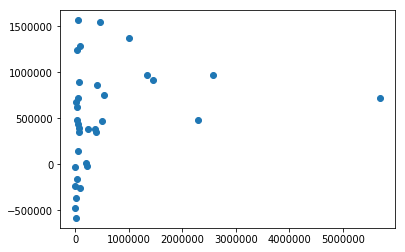

In [65]:
plt.scatter(y_test,predicao)

In [75]:
print(predicao)

[ -28037.05565755  481264.87704134 1092931.13308908 -189038.66475796
  203686.78776193  671362.33556697 1139739.80575516 1144714.67863646
 1344689.01234045 -304106.75891657  501389.72672728 1761607.72760388
   98042.57815562  869449.41537936  299416.64523437 -342450.61957149
 -222686.86425714  827810.10170036  538478.30222826  449805.86036675
 -408289.36638393   67435.87521787  569831.04957974  470629.83759023
  346886.49213387  221219.01493063 -129342.55947337  531719.00419002
  197573.94315871  -46257.78488625   53329.45856283   27859.0893194
 1561886.51518688  260337.45805718]
